#Download data

In [1]:
import json

# Membuat file kaggle.json dengan API token Anda
api_token = {"username":"krisnandi9998","key":"2d15c9eb5dd2bb51786765892d7218d9"}

# Membuat folder kaggle dan menyimpan token API
!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Mengubah izin akses untuk file API
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi kredensial
!kaggle datasets list

# Unduh dataset menggunakan API Kaggle
!kaggle datasets download -d krupalpatel07/apple-stock-data
!unzip apple-stock-data.zip -d /content/apple-stock-data

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          19273        357  1.0              
abdulszz/spotify-most-streamed-songs                             Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           5711         73  1.0              
owm4096/laptop-prices                                            Laptop Prices                                        25KB  2024-09-09 12:43:01           5972         93  1.0              
waqi786/remote-work-and-mental-health                  

#Membaca dan Menampilkan Data

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('apple-stock-data/AAPL.csv')

# Display first few rows
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600
1,1,1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800
2,2,1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000
3,3,1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600
4,4,1980-12-18,0.091737,0.092167,0.091737,0.091737,73449600


5 data awal dari tahun 1980

In [3]:
# Display end few rows
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
10982,10982,2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100
10983,10983,2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700
10984,10984,2024-07-11,231.389999,232.389999,225.770004,227.570007,64710600
10985,10985,2024-07-12,228.919998,232.639999,228.679993,230.539993,53008200
10986,10986,2024-07-15,236.531998,237.229996,233.089996,234.399994,58409071


5 data akhir berada di tahun 2024

In [4]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10987 non-null  int64  
 1   Date        10987 non-null  object 
 2   Open        10987 non-null  float64
 3   High        10987 non-null  float64
 4   Low         10987 non-null  float64
 5   Close       10987 non-null  float64
 6   Volume      10987 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 601.0+ KB


,Unnamed: 0,Open,High,Low,Close,Volume
count,10987.000000,10987.000000,10987.000000,10987.000000,10987.000000,1.098700e+04
mean,5493.000000,21.302671,21.532961,21.083972,21.317731,3.183499e+08
std,3171.818038,45.148670,45.636083,44.700569,45.189553,3.355121e+08
min,0.000000,0.038331,0.038331,0.037900,0.037900,0.000000e+00
25%,2746.500000,0.241839,0.246853,0.237279,0.242029,1.133830e+08
50%,5493.000000,0.430761,0.437763,0.422418,0.429639,2.059652e+08
75%,8239.500000,17.249799,17.383506,17.076788,17.230839,3.986920e+08
max,10986.000000,236.531998,237.229996,233.089996,234.399994,7.421641e+09


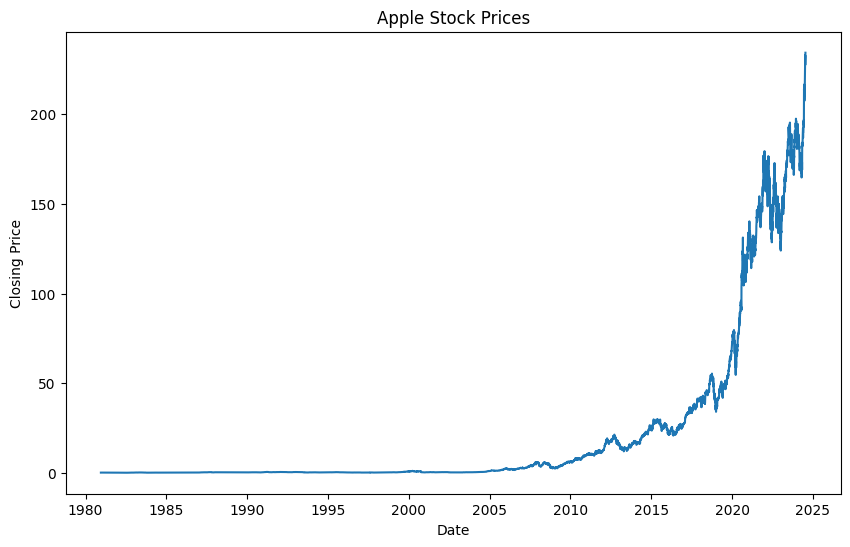

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Loading the dataset
data = pd.read_csv('apple-stock-data/AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Pada bagian ini, kita memuat dataset dan menampilkan grafik harga penutupan saham AAPL.

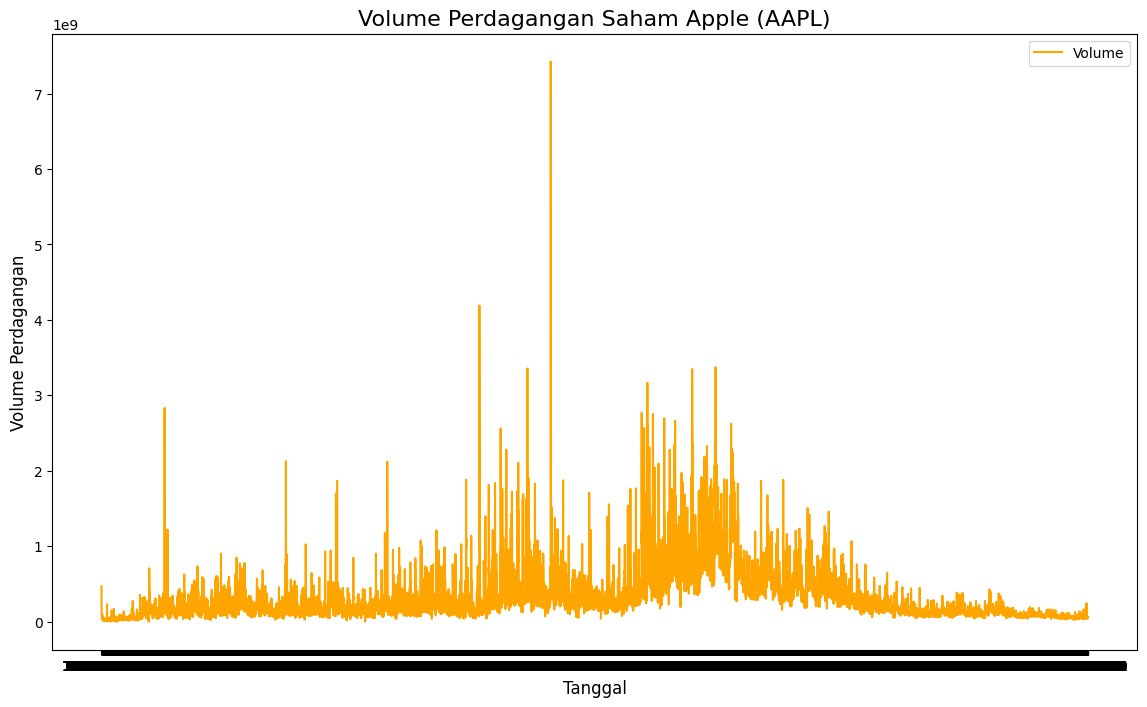

In [6]:
# Plot the trading volume for AAPL
plt.figure(figsize=(14,8))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Volume Perdagangan Saham Apple (AAPL)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Volume Perdagangan', fontsize=12)
plt.legend(loc='upper right')
plt.show()

Pada bagian ini, kita memuat dataset dan menampilkan grafik tren distribusi perdagangan saham AAPL.




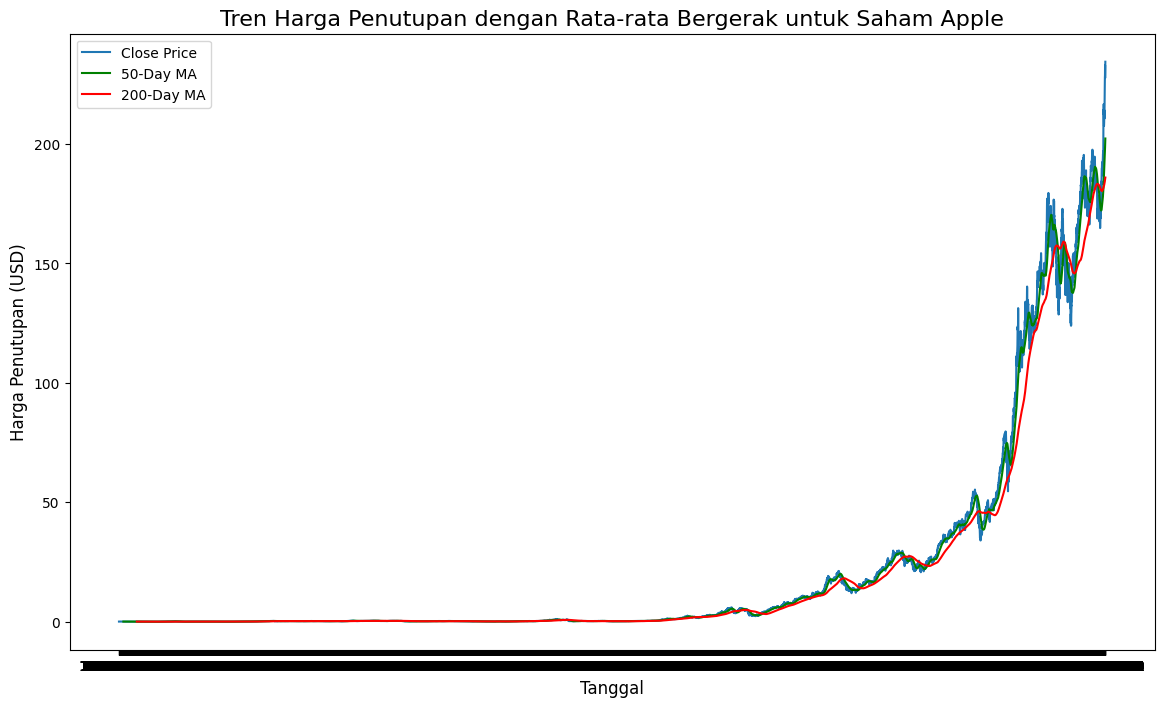

In [12]:
# Calculate the 50-day and 200-day moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot closing price with moving averages
plt.figure(figsize=(14,8))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='green')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='red')
plt.title('Tren Harga Penutupan dengan Rata-rata Bergerak untuk Saham Apple', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.legend(loc='upper left')
plt.show()

pada bagian ini menghitung dan memplot rata-rata bergerak 50 hari dan 200 hari untuk melihat tren jangka pendek dan jangka panjang. Rata-rata bergerak membantu mengidentifikasi arah tren dan mencegah kebingungan akibat fluktuasi jangka pendek. Jika rata-rata bergerak 50 hari melampaui rata-rata 200 hari, ini bisa menunjukkan potensi tren bullish.

#Praproses Data

In [7]:
# Preprocessing for machine learning models
data_ml = data[['Close']]

# Feature Engineering: Using previous days as features for regression models
data_ml['Close_shifted'] = data_ml['Close'].shift(1)
data_ml.dropna(inplace=True)

# Splitting the data into training and test sets
train, test = train_test_split(data_ml, test_size=0.2, shuffle=False)

# Separate features and labels
X_train, y_train = train[['Close_shifted']], train['Close']
X_test, y_test = test[['Close_shifted']], test['Close']

# Scale data for machine learning models
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-7-c86bb5ea2456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['Close_shifted'] = data_ml['Close'].shift(1)
<ipython-input-7-c86bb5ea2456>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml.dropna(inplace=True)


Pada tahap ini, kita melakukan praproses pada data, termasuk penggeseran data untuk membuat fitur dan label yang sesuai. Data kemudian dibagi menjadi set pelatihan dan pengujian.

#Linear Regression

In [8]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

Implementasi model Linear Regression untuk prediksi harga saham.

#Random Forest Regression

In [9]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

Implementasi model Random Forest untuk prediksi harga saham.

#ARIMA Model

In [10]:
# ARIMA Model
model_arima = ARIMA(train['Close'], order=(1,1,3))
model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Implementasi model ARIMA untuk prediksi deret waktu pada harga saham.


#LSTM Model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
# LSTM Model Preparation
train_set = data[['Close']].values

# Scaling for LSTM
scaler_lstm = MinMaxScaler()
train_scaled = scaler_lstm.fit_transform(train_set)

# Prepare dataset for LSTM
X_lstm, y_lstm = [], []
for i in range(60, len(train_scaled)):
    X_lstm.append(train_scaled[i-60:i, 0])
    y_lstm.append(train_scaled[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# Add early stopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

lstm_model.fit(X_lstm, y_lstm, epochs=50, batch_size=64, callbacks=[early_stop])

# Predicting using LSTM
inputs = data['Close'][len(data)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler_lstm.transform(inputs)

X_test_lstm = []
for i in range(60, len(inputs)):
    X_test_lstm.append(inputs[i-60:i, 0])

X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = scaler_lstm.inverse_transform(y_pred_lstm)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - loss: 0.0052
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - loss: 9.8823e-05
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - loss: 8.6859e-05
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 8.0104e-05
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 7.8791e-05
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 6.4989e-05
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 6.3394e-05
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - loss: 7.7688e-05
Epoch 9/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 6.4045e-05
Epoch 10/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 5.4943e-05
Epoch 11/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 4.2676e-05
Epoch 12/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 5.7535e-05
Epoch 13/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 5.5488e-05
Epoch 14/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/s

Implementasi model LSTM untuk memprediksi harga saham dengan data historis.

#Evaluasi Model

In [16]:
# Evaluating Models (Mean Squared Error)
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_arima = mean_squared_error(y_test, y_pred_arima)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest MSE: {mse_rf}")
print(f"ARIMA MSE: {mse_arima}")
print(f"LSTM MSE: {mse_lstm}")

Linear Regression MSE: 3.8184822210944263
Random Forest MSE: 7660.937251689621
ARIMA MSE: 8218.143503217441
LSTM MSE: 5.810284009209993


In [17]:
from sklearn.metrics import r2_score

# Menghitung R-squared
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_arima = r2_score(y_test, y_pred_arima)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"Linear Regression R-squared: {r2_lr}")
print(f"Random Forest R-squared: {r2_rf}")
print(f"ARIMA R-squared: {r2_arima}")
print(f"LSTM R-squared: {r2_lstm}")

Linear Regression R-squared: 0.9989278135967827
Random Forest R-squared: -1.1511040988448897
ARIMA R-squared: -1.307561280542748
LSTM R-squared: 0.9983685382953753


In [18]:
# Fungsi untuk plot prediksi vs harga aktual
def plot_predictions(model_name, actual, predicted, data, training_data_len):
    plt.figure(figsize=(16, 8))
    plt.title(f'Prediksi vs Harga Aktual untuk {model_name}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Harga Penutupan dalam USD', fontsize=12)
    plt.plot(data.index[training_data_len:], actual, label='Harga Aktual')
    plt.plot(data.index[training_data_len:], predicted, label=f'Prediksi {model_name}', color='red')
    plt.legend(loc='lower right')
    plt.show()

# Assuming training_data_len is calculated somewhere before this part
training_data_len = len(data) - len(test)  # Example: Calculate based on test set length

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_arima = mean_squared_error(y_test, y_pred_arima)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)

# Store MSE values in a dictionary
mse_values = {
    "Linear Regression": mse_lr,
    "Random Forest": mse_rf,
    "ARIMA": mse_arima,
    "LSTM": mse_lstm
}

# Find the model with the lowest MSE
best_model = min(mse_values, key=mse_values.get)

# Print the best model and its MSE
print(f"Model terbaik adalah: {best_model} dengan MSE: {mse_values[best_model]}")

Model terbaik adalah: Linear Regression dengan MSE: 3.8184822210944263


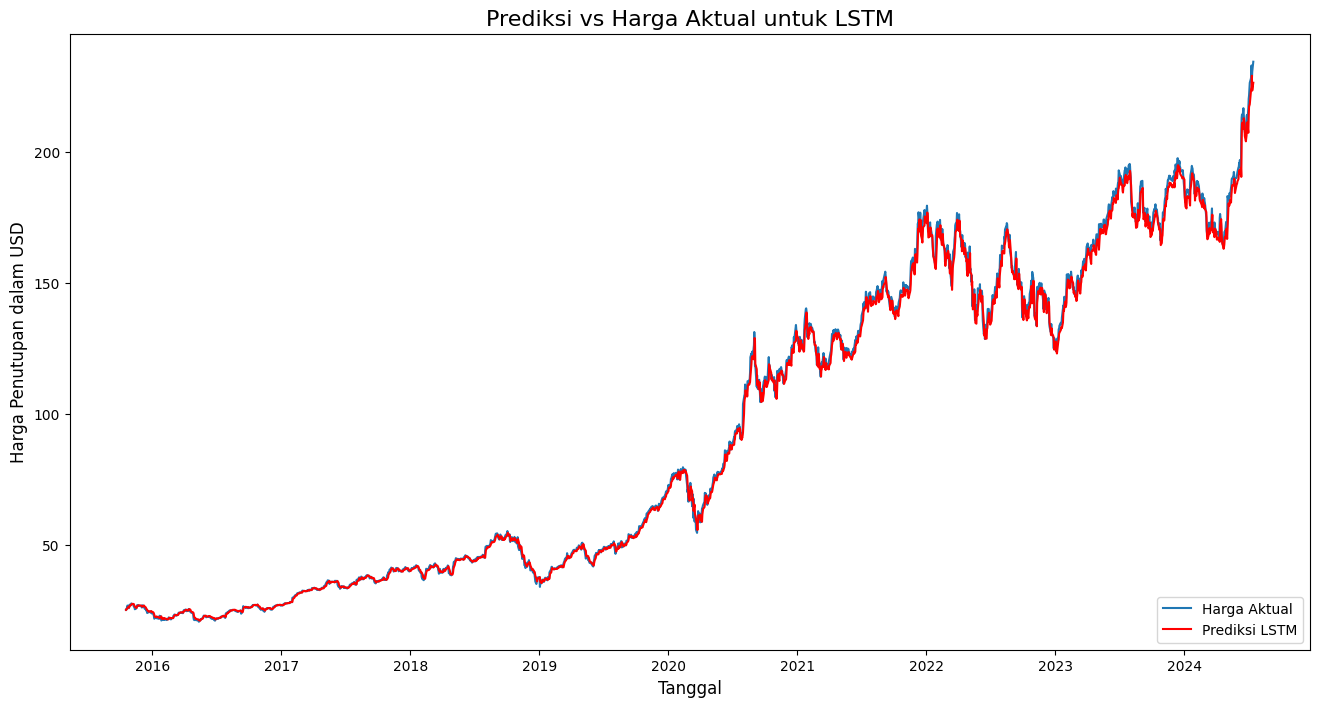

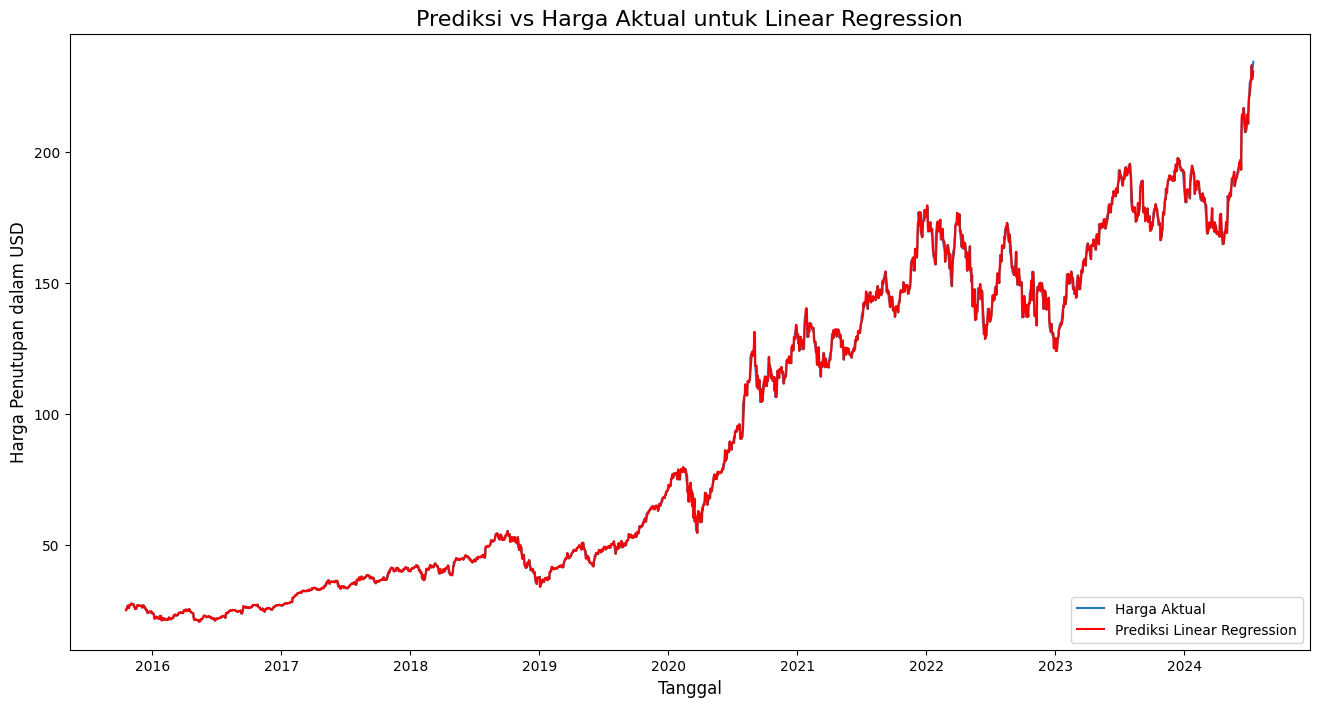

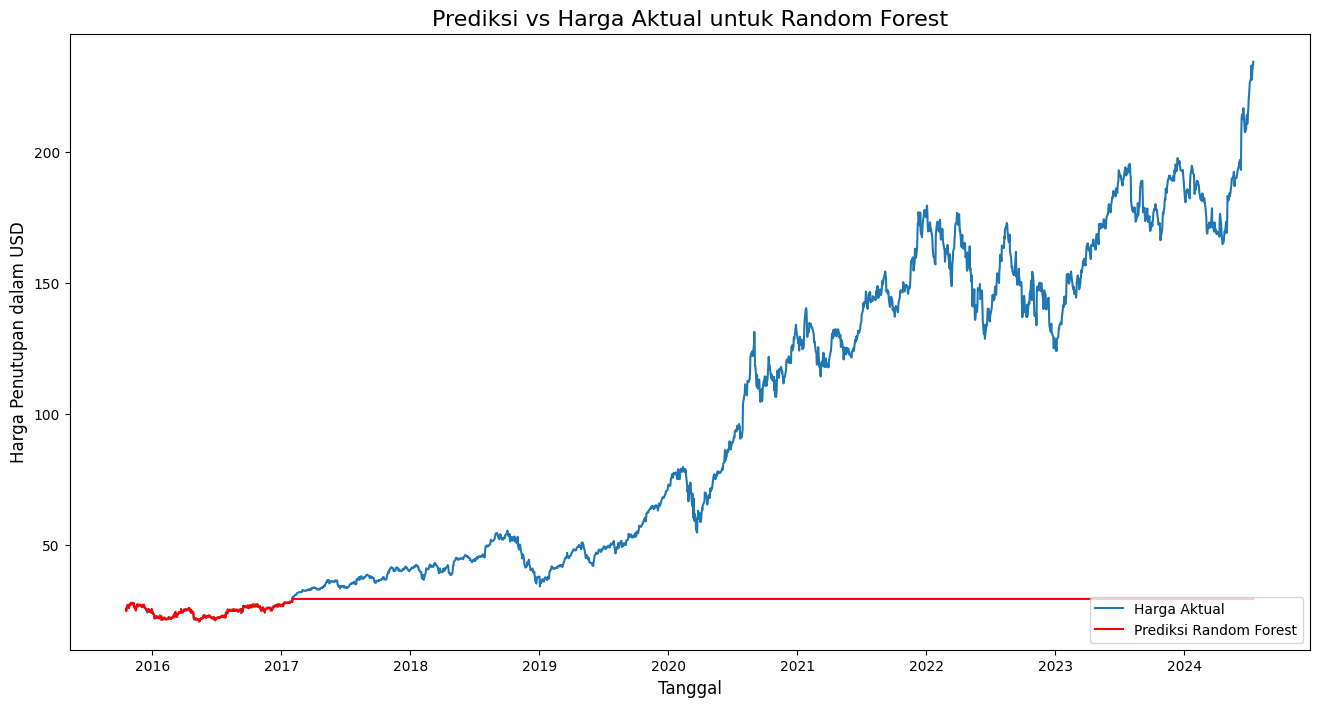

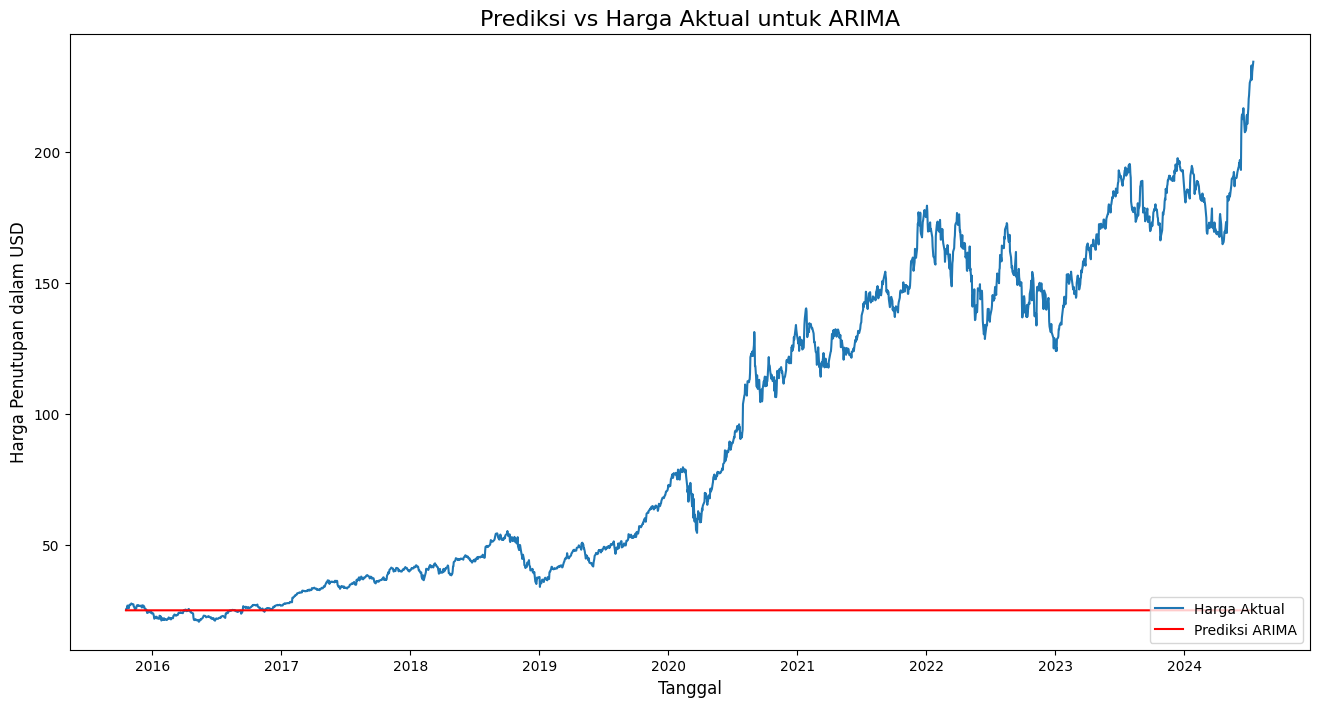

In [19]:
# Plot predictions for LSTM
plot_predictions("LSTM", y_test, y_pred_lstm, data, training_data_len)

# Plot predictions for Linear Regression
plot_predictions("Linear Regression", y_test, y_pred_lr, data, training_data_len)

# Plot predictions for Random Forest
plot_predictions("Random Forest", y_test, y_pred_rf, data, training_data_len)

# Plot predictions for ARIMA
plot_predictions("ARIMA", y_test, y_pred_arima, data, training_data_len)